# Import

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

import fidle
# run_id, run_dir, datasets_dir = fidle.init('MNIST1')

# Load Data

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)


x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


In [6]:
import tensorflow as tf
path = './mnist.zip'
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path)
len(train_images)

60000

# Normalize Data

In [9]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


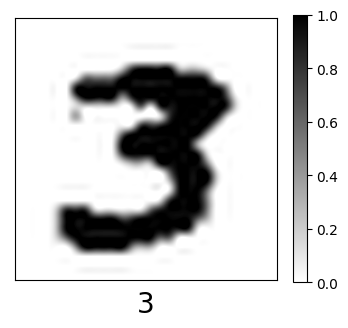

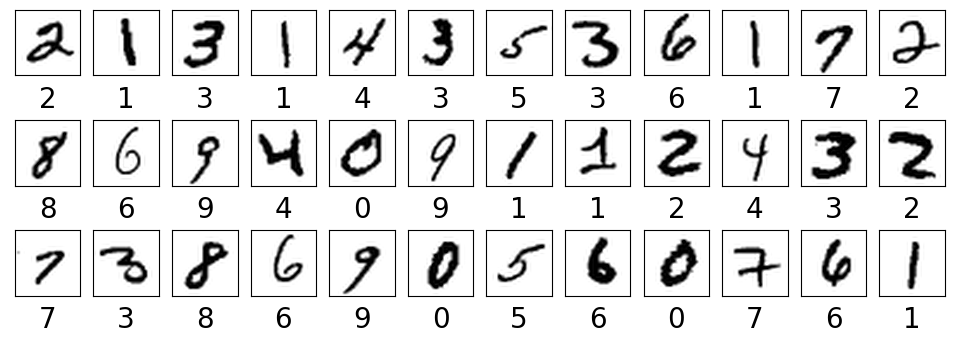

In [10]:
fidle.scrawler.images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
fidle.scrawler.images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

# Create and train the model

In [11]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 [==============================] - 3s 16ms/step - loss: 0.5601 - accuracy: 0.8494 - val_loss: 0.2393 - val_accuracy: 0.9323
Epoch 2/16
118/118 [==============================] - 1s 12ms/step - loss: 0.2088 - accuracy: 0.9405 - val_loss: 0.1767 - val_accuracy: 0.9468
Epoch 3/16
118/118 [==============================] - 1s 12ms/step - loss: 0.1539 - accuracy: 0.9559 - val_loss: 0.1412 - val_accuracy: 0.9587
Epoch 4/16
118/118 [==============================] - 1s 11ms/step - loss: 0.1232 - accuracy: 0.9644 - val_loss: 0.1186 - val_accuracy: 0.9647
Epoch 5/16
118/118 [==============================] - 1s 11ms/step - loss: 0.1043 - accuracy: 0.9699 - val_loss: 0.1062 - val_accuracy: 0.9687
Epoch 6/16
118/118 [==============================] - 1s 12ms/step - loss: 0.0877 - accuracy: 0.9750 - val_loss: 0.0972 - val_accuracy: 0.9704
Epoch 7/16
118/118 [==============================] - 1s 11ms/step - loss: 0.0752 - accuracy: 0.9780 - val_loss: 0.0899 - val_accuracy: 0.9732

# Evaluate the model

Test loss     : 0.08677205443382263
Test accuracy : 0.9751999974250793


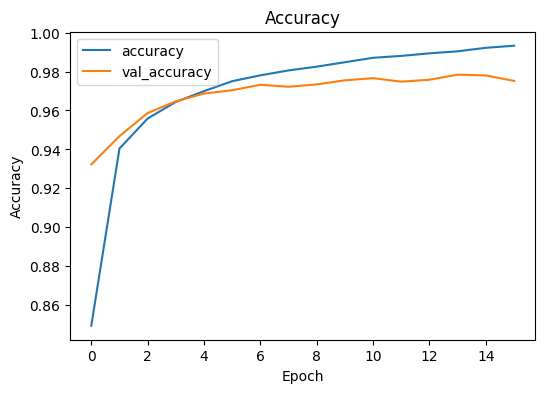

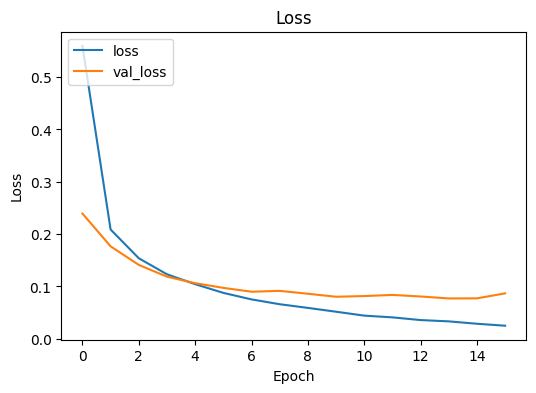

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])
fidle.scrawler.history(history, figsize=(6,4), save_as='03-history')

# Classify

313/313 [==============================] - 1s 1ms/step


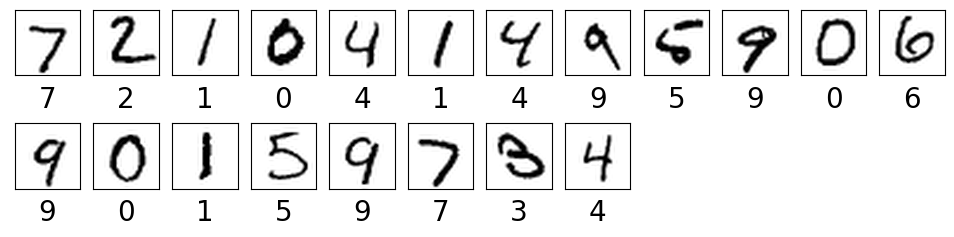

In [13]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

fidle.scrawler.images(x_test, y_test, range(0,20), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

# Plot errors

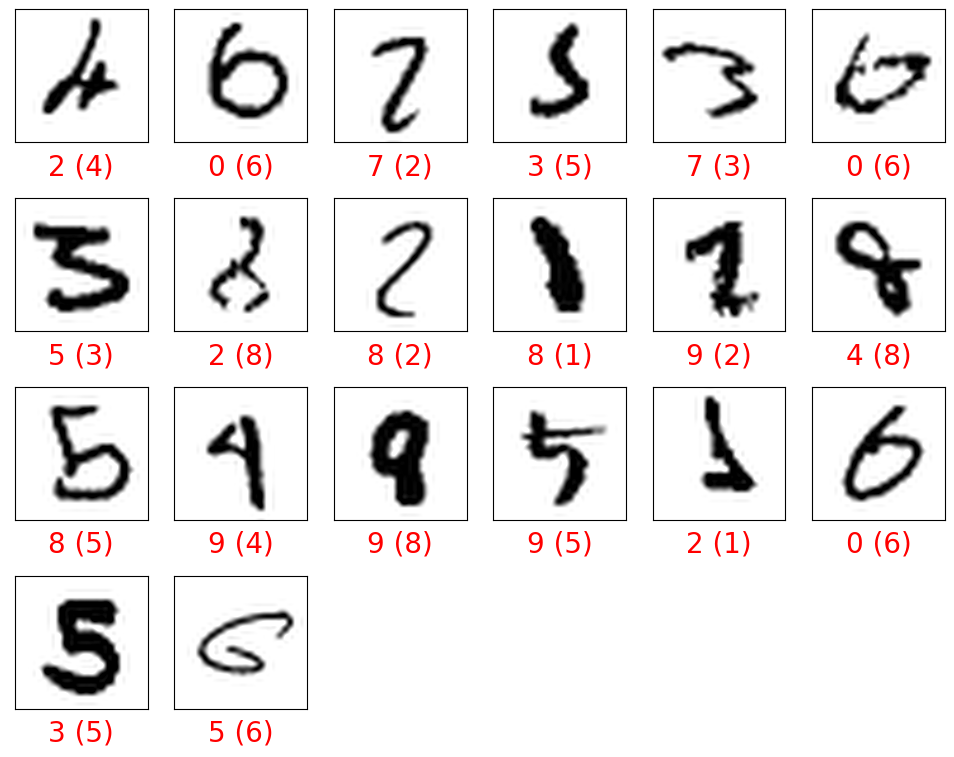

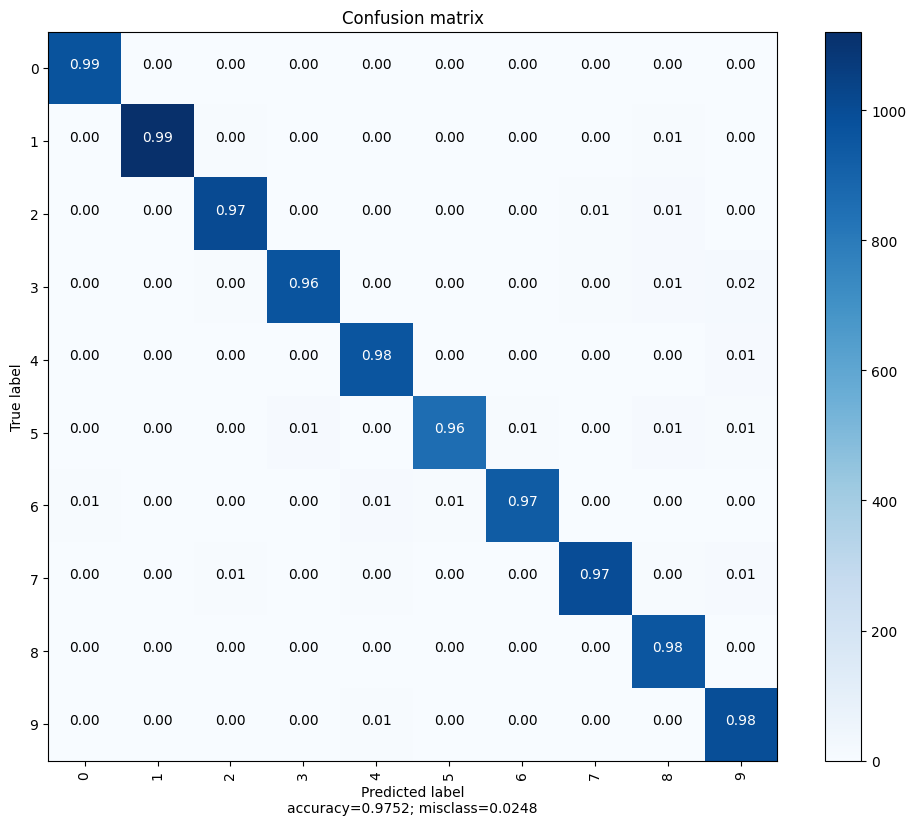

KeyError: '__global__'

In [15]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
fidle.scrawler.images(x_test, y_test, errors[:20], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')
fidle.scrawler.confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')
fidle.end()